In [1]:
import himage as hi
import numpy as np
import os
import skimage as ski

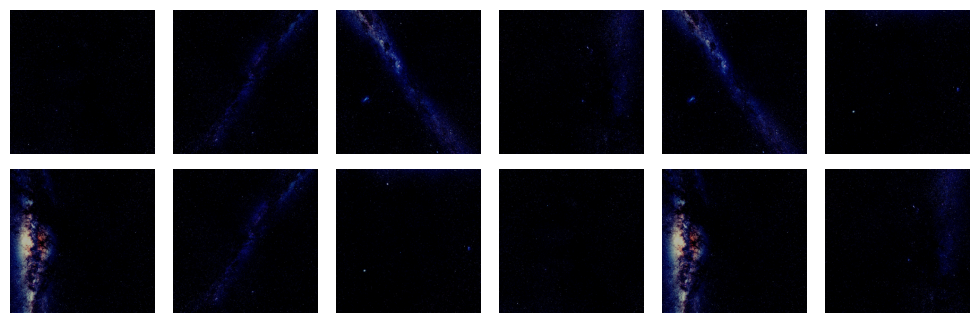

In [2]:
files = os.listdir("images/MilkyWay")
ims = [hi.imread(f"images/MilkyWay/{f}") for f in files]
hi.multimshow(ims, n_cols= 6)

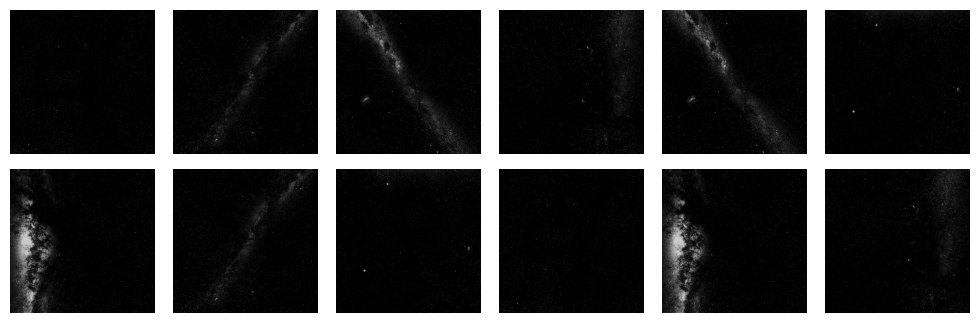

In [3]:
gray_ims = [np.mean(im, axis=-1) for im in ims]
hi.multimshow(gray_ims, n_cols= 6)

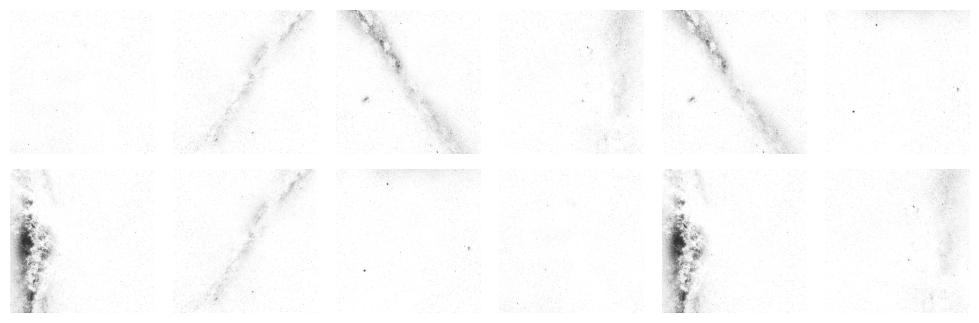

In [4]:
neg_ims = [1- im for im in gray_ims]
hi.multimshow(neg_ims, n_cols= 6)

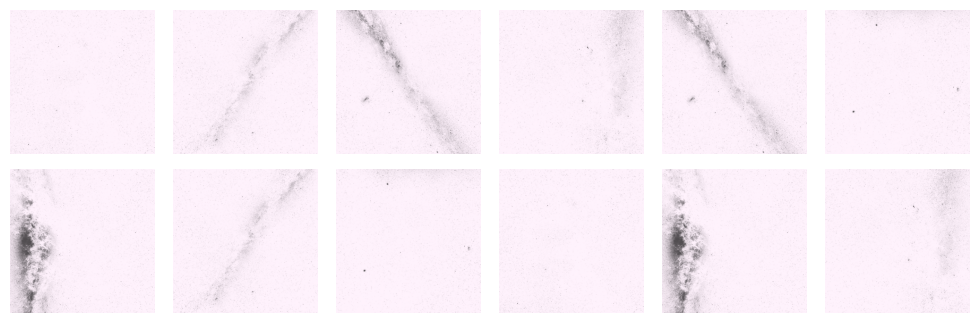

In [5]:
res_ims = [np.stack((im, im*0.95, im*0.99) ,axis=2) for im in neg_ims]
hi.multimshow(res_ims, n_cols=6)

In [6]:
os.makedirs( "images/PinkWorld", exist_ok=True)

[hi.imwrite(im, f"images/PinkWorld/{f}") for f, im in zip(files, res_ims)]

[None, None, None, None, None, None, None, None, None, None, None, None]

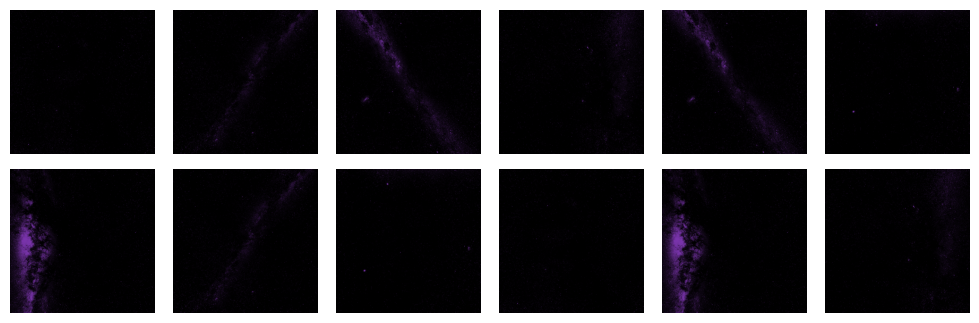

In [7]:
res_ims = [np.stack((im*0.7, im*0.3, im*0.99) ,axis=2) for im in gray_ims]
hi.multimshow(res_ims, n_cols=6)

In [8]:
os.makedirs( "images/DarkPinkWorld", exist_ok=True)

[hi.imwrite(im, f"images/DarkPinkWorld/{f}") for f, im in zip(files, res_ims)]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [69]:
def shiftColorsPurple(im):
    hsv = ski.color.rgb2hsv(im)
    h = hi.normalize_min_max(hsv[:,:,0]) 
    hsv[:,:,0] = (.7 + h/4.4)%1
    return ski.color.hsv2rgb(hsv)

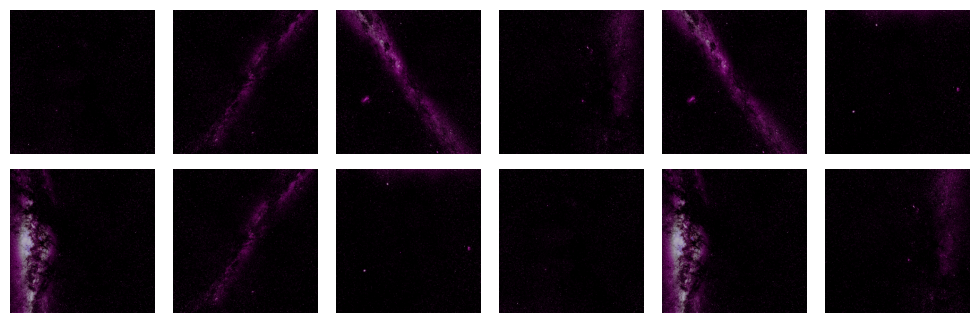

In [70]:
res_ims = [shiftColorsPurple(im) for im in ims]
hi.multimshow(res_ims, n_cols=6)

In [71]:
os.makedirs( "images/PurpleShiftedWorld", exist_ok=True)

[hi.imwrite(im, f"images/PurpleShiftedWorld/{f}") for f, im in zip(files, res_ims)]

[None, None, None, None, None, None, None, None, None, None, None, None]